In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
train_data = pd.read_csv('../Data/mnist/mnist_train.csv')
test_data = pd.read_csv('../Data/mnist/mnist_test.csv')

In [4]:
print(f"Shape of training data csv: {train_data.shape}")
train_data.head()

Shape of training data csv: (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f"Shape of test data csv: {test_data.shape}")
test_data.head()

Shape of test data csv: (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = np.array(train_data)
m, n = data.shape
np.random.shuffle(data)

val_data = data[0:1000].T
Y_val = val_data[0]
X_val = val_data[1:n]
X_val = X_val / 255

train_data = data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255
_, m_train = X_train.shape

In [7]:
Y_train

array([1, 4, 3, ..., 7, 1, 1])

In [8]:
X_train[:, 0].shape

(784,)

In [9]:
def initialise_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def ReLU_derivative(Z):
    return Z > 0

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2

    return W1, b1, W2, b2


In [10]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [11]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initialise_parameters()

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        if i % 10 == 0:
            print(f'Iteration: {i}')
            predictions = get_predictions(A2)
            print(f'Accuracy: {get_accuracy(predictions, Y)}')

    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[7 4 5 ... 9 8 8] [1 4 3 ... 7 1 1]
Accuracy: 0.10358536585365853
Iteration: 10
[7 4 8 ... 8 0 8] [1 4 3 ... 7 1 1]
Accuracy: 0.13582926829268294
Iteration: 20
[7 8 0 ... 8 8 7] [1 4 3 ... 7 1 1]
Accuracy: 0.1894390243902439
Iteration: 30
[3 0 3 ... 8 8 7] [1 4 3 ... 7 1 1]
Accuracy: 0.25865853658536586
Iteration: 40
[3 0 3 ... 8 7 7] [1 4 3 ... 7 1 1]
Accuracy: 0.31341463414634146
Iteration: 50
[3 4 3 ... 8 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.39970731707317075
Iteration: 60
[3 4 3 ... 1 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.47348780487804876
Iteration: 70
[3 4 3 ... 1 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.5278780487804878
Iteration: 80
[3 4 3 ... 1 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.5804634146341463
Iteration: 90
[1 4 3 ... 1 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.6262439024390244
Iteration: 100
[1 4 3 ... 1 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.6592439024390244
Iteration: 110
[1 4 3 ... 1 1 1] [1 4 3 ... 7 1 1]
Accuracy: 0.685
Iteration: 120
[1 7 3 ... 7 1 1] [1 4 3 ... 7 1 1]
Accurac

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)

    return predictions

def test_prediction(index, W1, b1, W2, b2):
    image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print(f'Prediction: {prediction}')
    print(f'Label: {label}')

    image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

Prediction: [1]
Label: 1


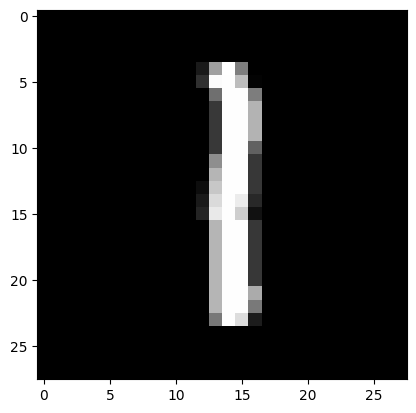

Prediction: [7]
Label: 9


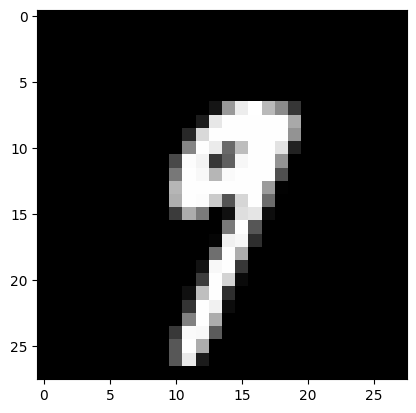

Prediction: [4]
Label: 9


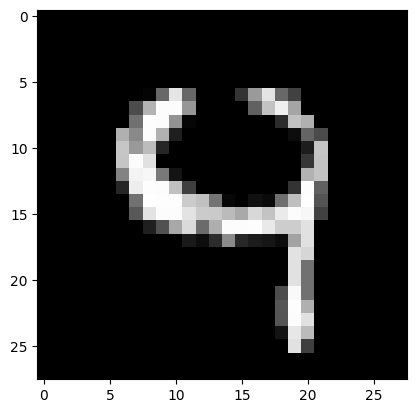

Prediction: [4]
Label: 4


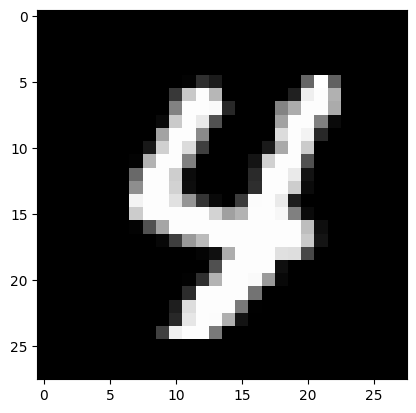

In [14]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(257, W1, b1, W2, b2)
test_prediction(903, W1, b1, W2, b2)
test_prediction(73, W1, b1, W2, b2)

Prediction: [2]
Label: 2


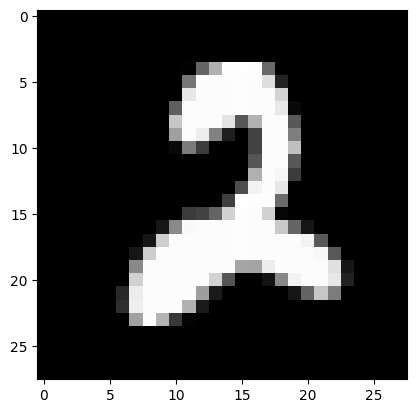

In [15]:
test_prediction(3149, W1, b1, W2, b2)

In [16]:
validation_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(validation_predictions, Y_val)

[9 8 8 4 0 8 1 8 2 4 1 1 2 7 3 4 3 3 8 8 8 6 4 4 7 5 7 4 6 8 8 9 5 1 7 4 0
 7 1 7 7 6 1 6 4 2 9 7 7 1 5 6 4 9 6 8 1 0 6 4 3 2 1 5 5 2 0 6 8 9 1 4 7 6
 5 5 7 7 5 7 5 9 7 8 0 8 1 6 3 7 8 2 1 8 5 8 6 4 4 9 7 9 5 2 2 0 9 6 6 6 8
 8 9 8 7 8 9 8 2 7 3 7 9 5 7 5 5 1 2 9 8 4 8 6 1 2 6 2 0 7 8 0 6 1 0 7 9 8
 7 8 2 2 7 3 7 3 4 7 5 6 4 4 0 0 8 5 6 1 0 4 6 6 1 0 6 0 1 0 0 7 0 8 8 1 4
 7 1 9 0 6 6 7 1 0 8 1 3 8 4 5 7 4 9 8 5 2 5 7 0 8 6 1 9 5 9 5 8 3 1 6 5 9
 3 4 9 0 7 7 0 6 7 2 1 8 8 6 2 1 8 2 5 4 1 1 2 0 9 6 7 9 6 4 0 4 5 9 2 5 6
 4 0 3 7 1 0 3 0 1 4 2 2 8 4 4 6 1 5 6 4 7 2 4 2 1 7 4 6 0 3 6 4 2 0 2 7 7
 6 6 7 0 8 9 2 4 5 4 6 0 8 1 2 0 8 0 2 5 0 2 5 8 2 3 8 4 6 6 3 5 5 1 4 8 4
 7 8 3 1 5 2 2 7 3 0 4 0 0 5 7 2 0 9 1 7 2 0 4 3 3 4 8 6 5 4 9 2 6 7 3 2 0
 2 1 6 6 5 6 1 5 6 8 4 5 8 1 8 6 0 6 1 0 0 8 9 9 9 7 8 6 7 0 5 7 5 0 0 1 3
 2 2 3 9 2 7 3 6 8 1 3 6 8 2 3 2 6 1 7 0 1 7 5 6 3 5 4 5 0 0 8 1 5 6 3 5 2
 5 5 9 5 2 2 1 6 9 7 8 9 2 7 6 4 1 0 2 2 2 3 2 1 6 7 0 2 0 4 2 8 9 3 4 7 4
 6 6 9 6 7 7 9 4 3 0 2 9 

0.841